In [28]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter
import collections

# CNV distribution

In [2]:
gene_features = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/final_compilation_work/gene_features.xlsx", index_col=0)
cnv_chrwise = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/final_compilation_work/notebooks/cnv_chrwise.xlsx", index_col=0)
reorderlist = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7','chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14','chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr21','chr22', 'chrX', 'chrY']
cnv_chrwise = cnv_chrwise.reindex(reorderlist)
# cnv_chrwise["total_all"] = [int(i) for i in cnv_chrwise["total_all"]]
cnv_chrwise.head()

,total_all,total_del,total_loss,total_gain,total_amp
chr_loc,,,,,
chr1,3037,463,600,1547,427
chr2,712,13,54,439,206
chr3,874,37,66,626,145
chr4,73,1,19,39,14
chr5,554,64,82,348,60


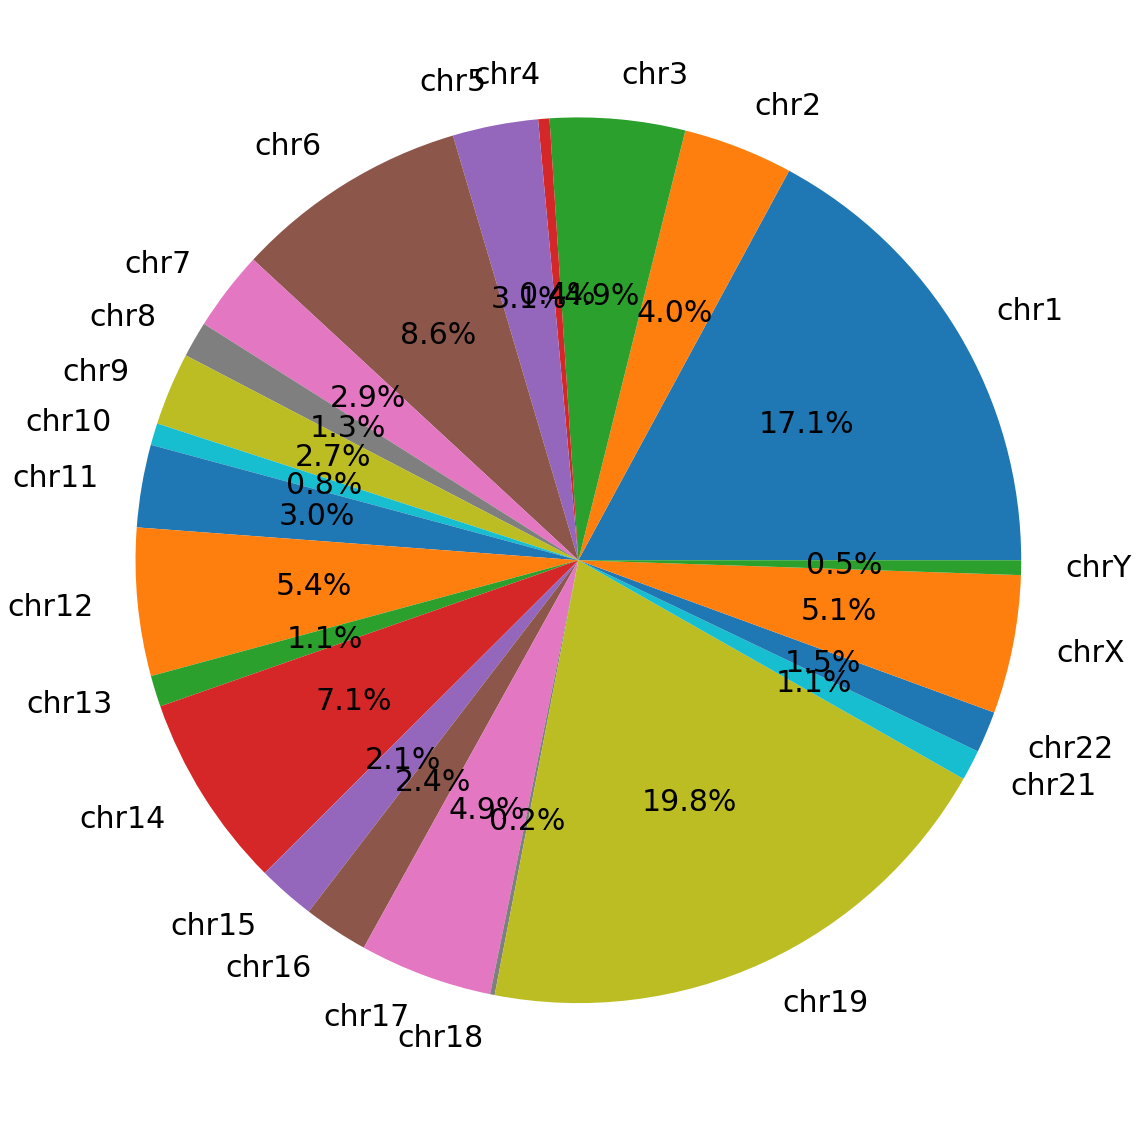

In [3]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(cnv_chrwise["total_all"], labels=cnv_chrwise.index, autopct='%.1f%%', textprops={'fontsize': 30})
# ax.set_title('Sport Popularity')
plt.tight_layout()
ax.figure.savefig('cnv_piechart.svg', format='svg', dpi=1300, bbox_inches='tight')


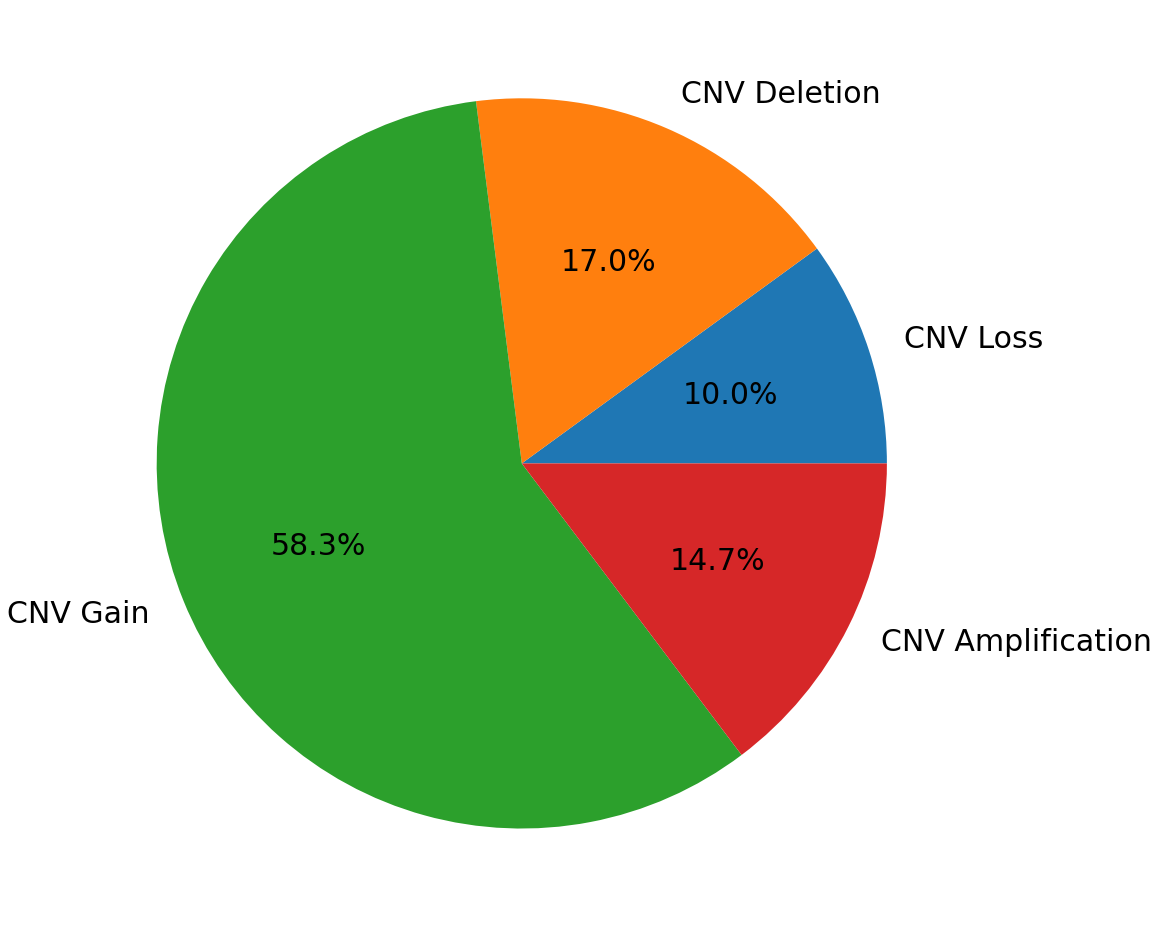

In [4]:
x = [cnv_chrwise["total_del"].sum(), cnv_chrwise["total_loss"].sum(), cnv_chrwise["total_gain"].sum(), cnv_chrwise["total_amp"].sum()]
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(x, labels=["CNV Loss","CNV Deletion","CNV Gain","CNV Amplification"], autopct='%.1f%%', textprops={'fontsize': 30})
# ax.set_title('Sport Popularity')
plt.tight_layout()
ax.figure.savefig('cnv_piechart1.svg', format='svg', dpi=1300, bbox_inches='tight')


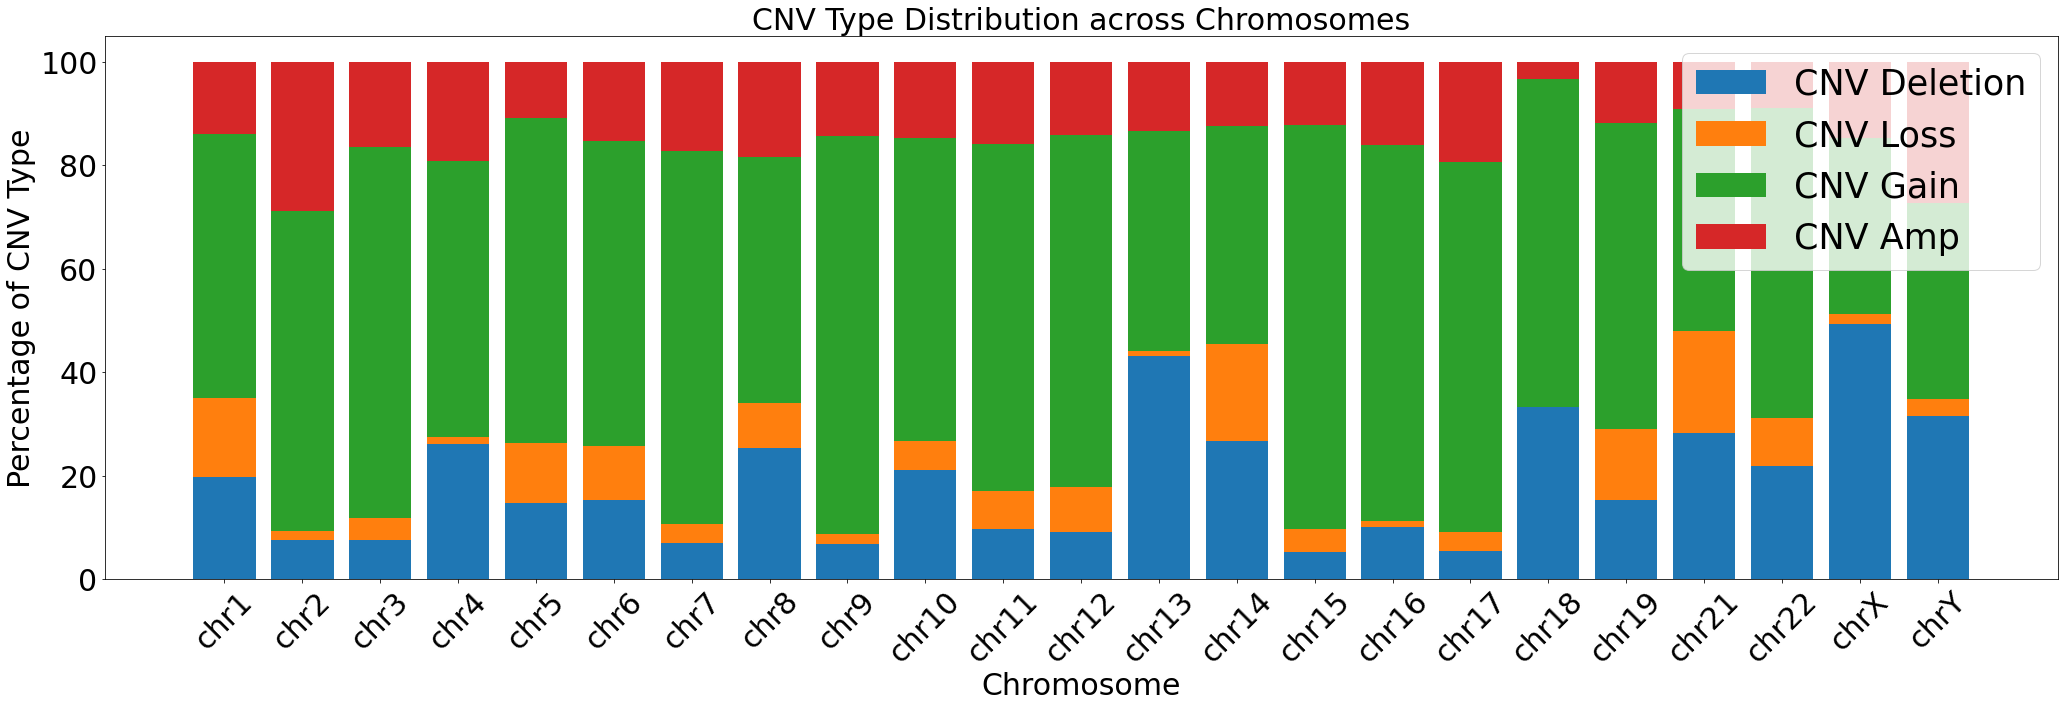

In [5]:
cnv_chrwise["total_amp"] = (cnv_chrwise["total_amp"]/cnv_chrwise["total_all"])*100
cnv_chrwise["total_gain"] = (cnv_chrwise["total_gain"]/cnv_chrwise["total_all"])*100
cnv_chrwise["total_del"] = (cnv_chrwise["total_del"]/cnv_chrwise["total_all"])*100
cnv_chrwise["total_loss"] = (cnv_chrwise["total_loss"]/cnv_chrwise["total_all"])*100

fig, ax = plt.subplots(figsize=(35, 10))
# First plot the 'Male' bars for every day.
ax.bar(cnv_chrwise.index, cnv_chrwise['total_loss'], label='CNV Deletion')
ax.bar(cnv_chrwise.index, cnv_chrwise['total_del'], bottom=cnv_chrwise['total_loss'], label='CNV Loss')
ax.bar(cnv_chrwise.index, cnv_chrwise['total_gain'], bottom=cnv_chrwise['total_del']+cnv_chrwise['total_loss'], label='CNV Gain')
ax.bar(cnv_chrwise.index, cnv_chrwise['total_amp'], bottom=cnv_chrwise['total_del']+cnv_chrwise['total_loss']+cnv_chrwise['total_gain'], label='CNV Amp')
ax.set_title('CNV Type Distribution across Chromosomes', fontdict={'fontsize': 30})
ax.tick_params(axis='x', labelsize=30, rotation=45)
ax.tick_params(axis='y', labelsize=30)
ax.set_ylabel('Percentage of CNV Type', fontsize=30)
ax.set_xlabel('Chromosome', fontsize=30)
ax.legend(fontsize=35, loc='upper right')
ax.figure.savefig('cnv_type_distribution.svg', bbox_inches='tight')


# SV Distribution

In [19]:
gene_features = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/final_compilation_work/gene_features.xlsx", index_col=0)
gene_features = gene_features[["chr_location","total_svs","INV","DUP","TRA","PossibleLargeIndel","DEL"]]
gene_features.head()

,chr_location,total_svs,INV,DUP,TRA,PossibleLargeIndel,DEL
MUC6,chr11,3,1,2,0,0,0
LILRA1,chr19,0,0,0,0,0,0
LILRB1,chr19,3,3,0,0,0,0
PDE4DIP,chr1,63,20,4,11,24,4
EIF4EBP1,chr8,11,5,2,1,1,2


In [20]:
sv_chrwise = pd.DataFrame()
chr_name, total_svs, inv, dup, tra, pli, dels = [], [], [], [], [], [], []
for chloc in tqdm(set(gene_features["chr_location"])):
    chr_name.append(chloc)
    total_svs.append(gene_features[gene_features["chr_location"]==chloc]["total_svs"].sum())
    inv.append(gene_features[gene_features["chr_location"]==chloc]["INV"].sum())
    dup.append(gene_features[gene_features["chr_location"]==chloc]["DUP"].sum())
    tra.append(gene_features[gene_features["chr_location"]==chloc]["TRA"].sum())
    pli.append(gene_features[gene_features["chr_location"]==chloc]["PossibleLargeIndel"].sum())
    dels.append(gene_features[gene_features["chr_location"]==chloc]["DEL"].sum())
    
sv_chrwise["chr_name"] = chr_name
sv_chrwise["total_svs"] = total_svs
sv_chrwise["INV"] = inv
sv_chrwise["DUP"] = dup
sv_chrwise["TRA"] = tra
sv_chrwise["PossibleLargeIndel"] = pli
sv_chrwise["DEL"] = dels
sv_chrwise = sv_chrwise.set_index("chr_name")
reorderlist = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7','chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14','chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr21','chr22', 'chrX', 'chrY']
sv_chrwise = sv_chrwise.reindex(reorderlist)
sv_chrwise.to_excel("sv_chrwise.xlsx")
sv_chrwise.head()

100%|██████████| 24/24 [00:00<00:00, 275.55it/s]


,total_svs,INV,DUP,TRA,PossibleLargeIndel,DEL
chr_name,,,,,,
chr1,1012,694,49,127,73,69
chr2,557,409,35,35,33,45
chr3,558,433,23,34,38,30
chr4,191,61,6,111,5,8
chr5,355,276,15,26,10,28


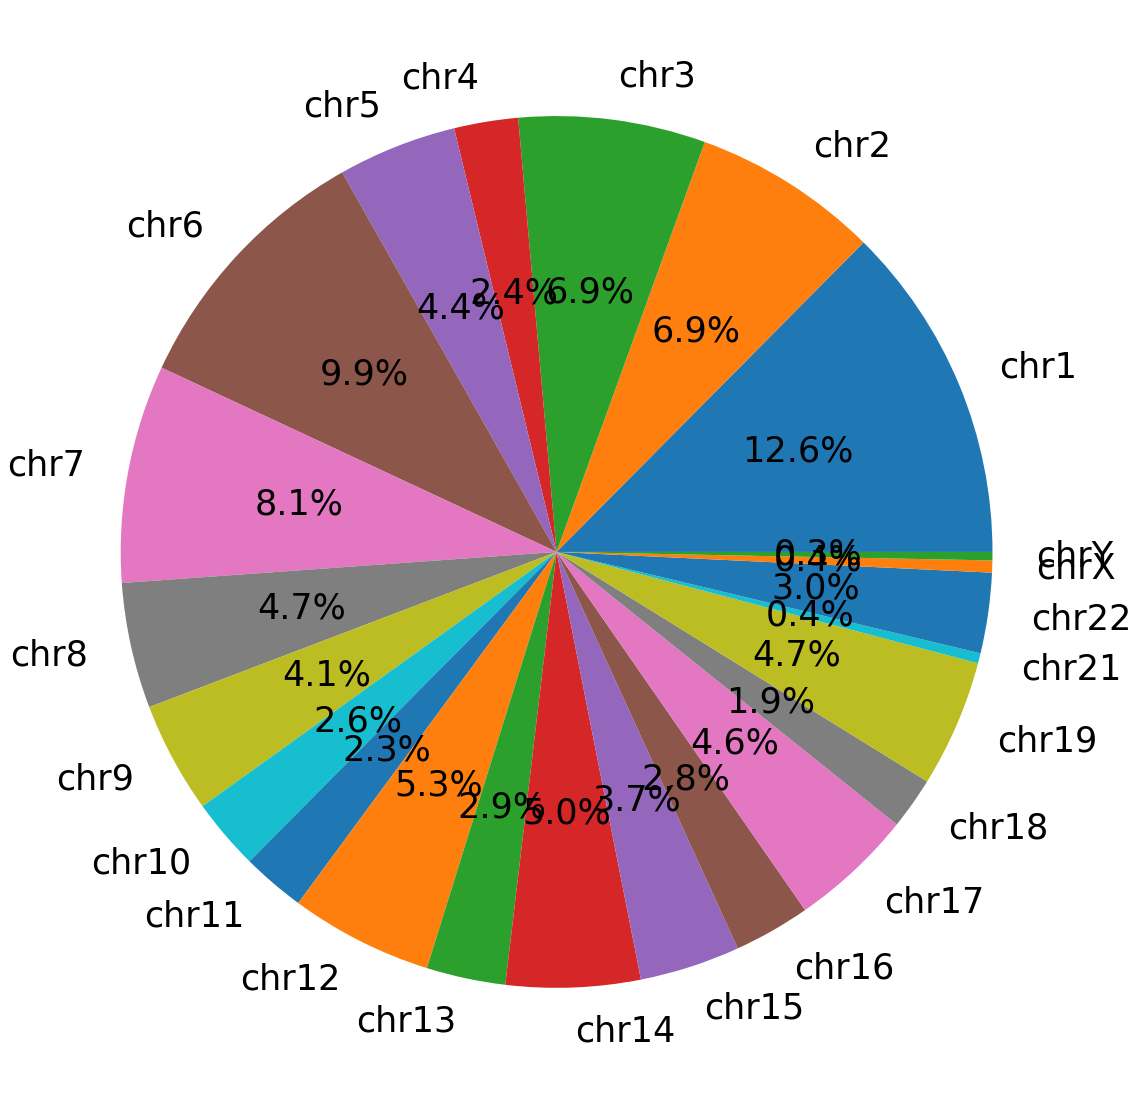

In [8]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(sv_chrwise["total_svs"], labels=sv_chrwise.index, autopct='%.1f%%', textprops={'fontsize': 35})
# ax.set_title('Sport Popularity')
plt.tight_layout()
ax.figure.savefig('sv_piechart.svg', format='svg', dpi=1350, bbox_inches='tight')

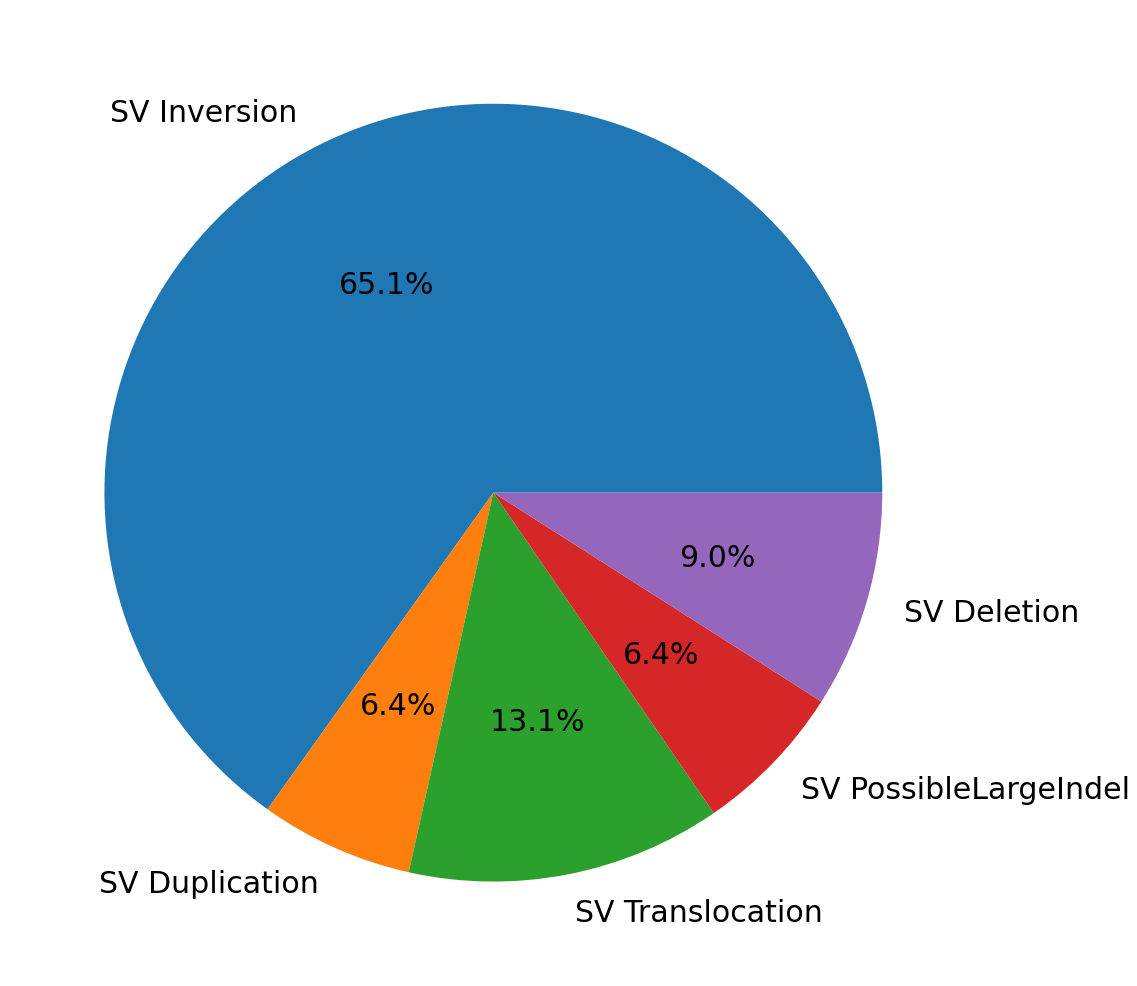

In [9]:
x = [sv_chrwise["INV"].sum(), sv_chrwise["DUP"].sum(), sv_chrwise["TRA"].sum(), sv_chrwise["PossibleLargeIndel"].sum(), sv_chrwise["DEL"].sum()]
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(x, labels=["SV Inversion","SV Duplication","SV Translocation","SV PossibleLargeIndel","SV Deletion"], autopct='%.1f%%', textprops={'fontsize': 30})
# ax.set_title('Sport Popularity')
plt.tight_layout()
ax.figure.savefig('sv_piechart1.svg', format='svg', dpi=1350, bbox_inches='tight')


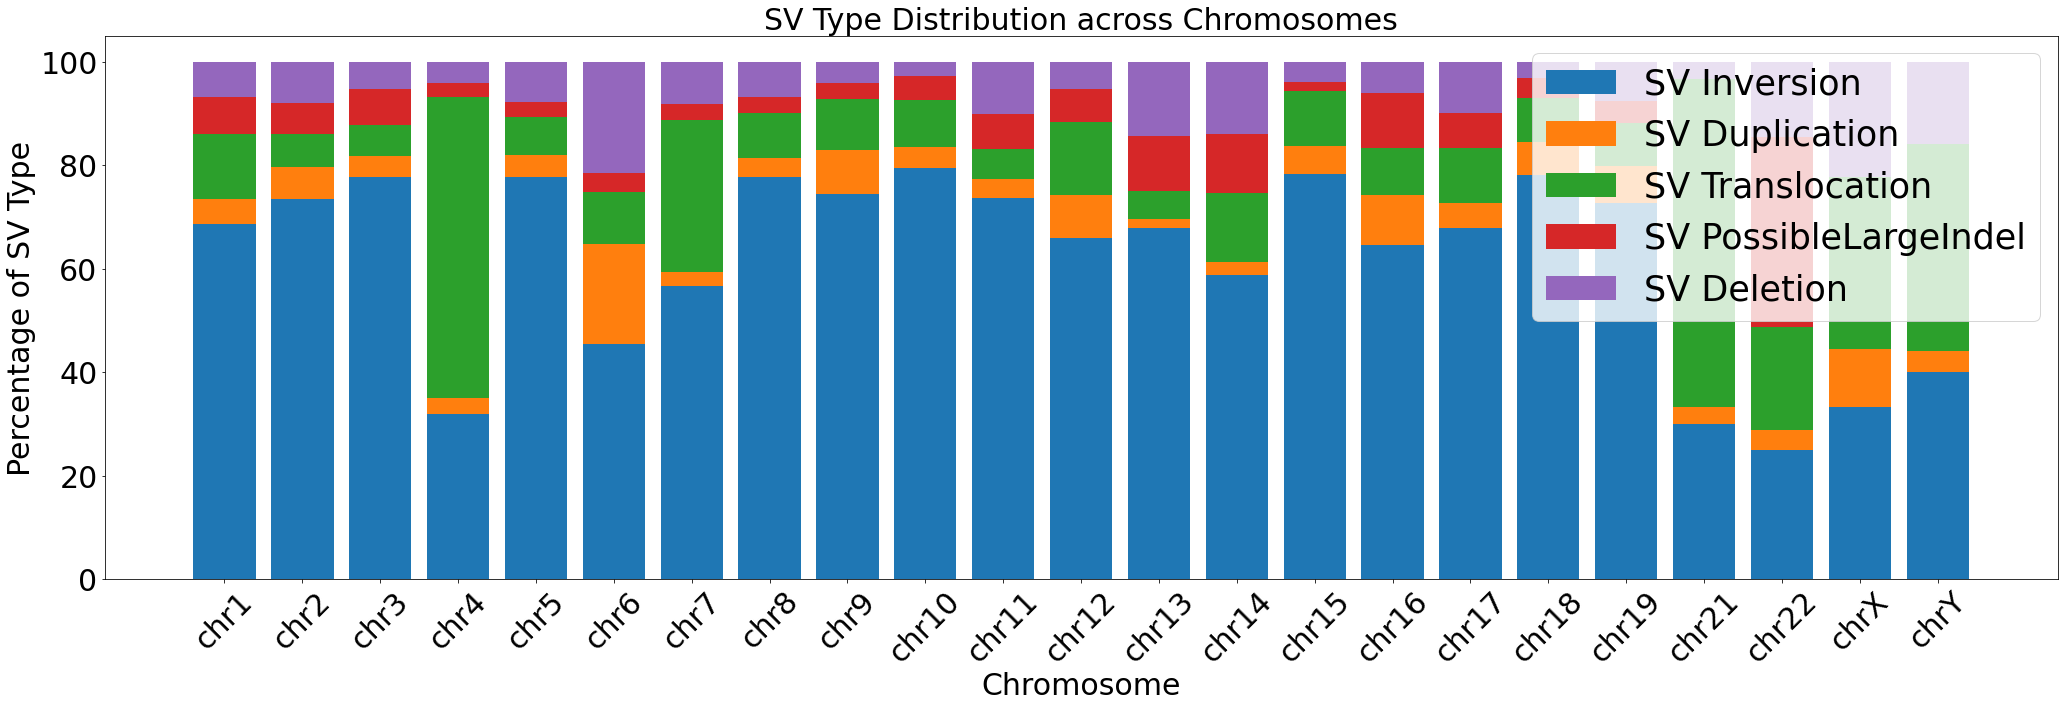

In [10]:
sv_chrwise["INV"] = (sv_chrwise["INV"]/sv_chrwise["total_svs"])*100
sv_chrwise["DUP"] = (sv_chrwise["DUP"]/sv_chrwise["total_svs"])*100
sv_chrwise["TRA"] = (sv_chrwise["TRA"]/sv_chrwise["total_svs"])*100
sv_chrwise["PossibleLargeIndel"] = (sv_chrwise["PossibleLargeIndel"]/sv_chrwise["total_svs"])*100
sv_chrwise["DEL"] = (sv_chrwise["DEL"]/sv_chrwise["total_svs"])*100

fig, ax = plt.subplots(figsize=(35, 10))
# First plot the 'Male' bars for every day.
ax.bar(sv_chrwise.index, sv_chrwise['INV'], label='SV Inversion')
ax.bar(sv_chrwise.index, sv_chrwise['DUP'], bottom=sv_chrwise['INV'], label='SV Duplication')
ax.bar(sv_chrwise.index, sv_chrwise['TRA'], bottom=sv_chrwise['INV']+sv_chrwise['DUP'], label='SV Translocation')
ax.bar(sv_chrwise.index, sv_chrwise['PossibleLargeIndel'], bottom=sv_chrwise['INV']+sv_chrwise['DUP']+sv_chrwise['TRA'], label='SV PossibleLargeIndel')
ax.bar(sv_chrwise.index, sv_chrwise['DEL'], bottom=sv_chrwise['INV']+sv_chrwise['DUP']+sv_chrwise['TRA']+sv_chrwise['PossibleLargeIndel'], label='SV Deletion')
ax.set_title('SV Type Distribution across Chromosomes', fontsize=30)
ax.tick_params(axis='x', labelsize=30, rotation=45)
ax.tick_params(axis='y', labelsize=30)
ax.set_ylabel('Percentage of SV Type', fontsize=30)
ax.set_xlabel('Chromosome', fontsize=30)
ax.legend(fontsize=35, loc='upper right')
ax.figure.savefig('sv_type_distribution.svg', bbox_inches='tight')


In [32]:
tgen_sv = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/SV_literature/mmrf_sv_filtered/mmrf_tgen_filtered500_filtered.xlsx")
delly_sv = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/SV_literature/mmrf_sv_filtered/mmrf_delly_filtered500_filtered.xlsx")
delly_sv.head()

,Specimen_ID,SVTYPE,CHROM,CHR2,POS,ENDPOSSV,sv_gene,genes500
0,MMRF_1016_1_BM,DEL,8,8,101715502,101718917,"RNU6-1092P,AP001205.1,PABPC1",PABPC1
1,MMRF_1016_1_BM,TRA,8,6,112083213,32453025,"HLA-DRB5,RP11-946L20.4,HLA-DRA,RP11-946L20.2",HLA-DRB5
2,MMRF_1016_1_BM,TRA,12,1,5019811,239764845,"CHRM3-AS2,GALNT8,CHRM3,RP11-544D21.1,RP11-429A...",CHRM3
3,MMRF_1020_3_BM,INV,1,1,237637502,237638266,"RYR2,MIR4428,SNORA25",RYR2
4,MMRF_1020_3_BM,DEL,5,5,81573135,98108052,"CHD1,ATP6AP1L,AC022142.1,RGMB,ATG10",RGMB


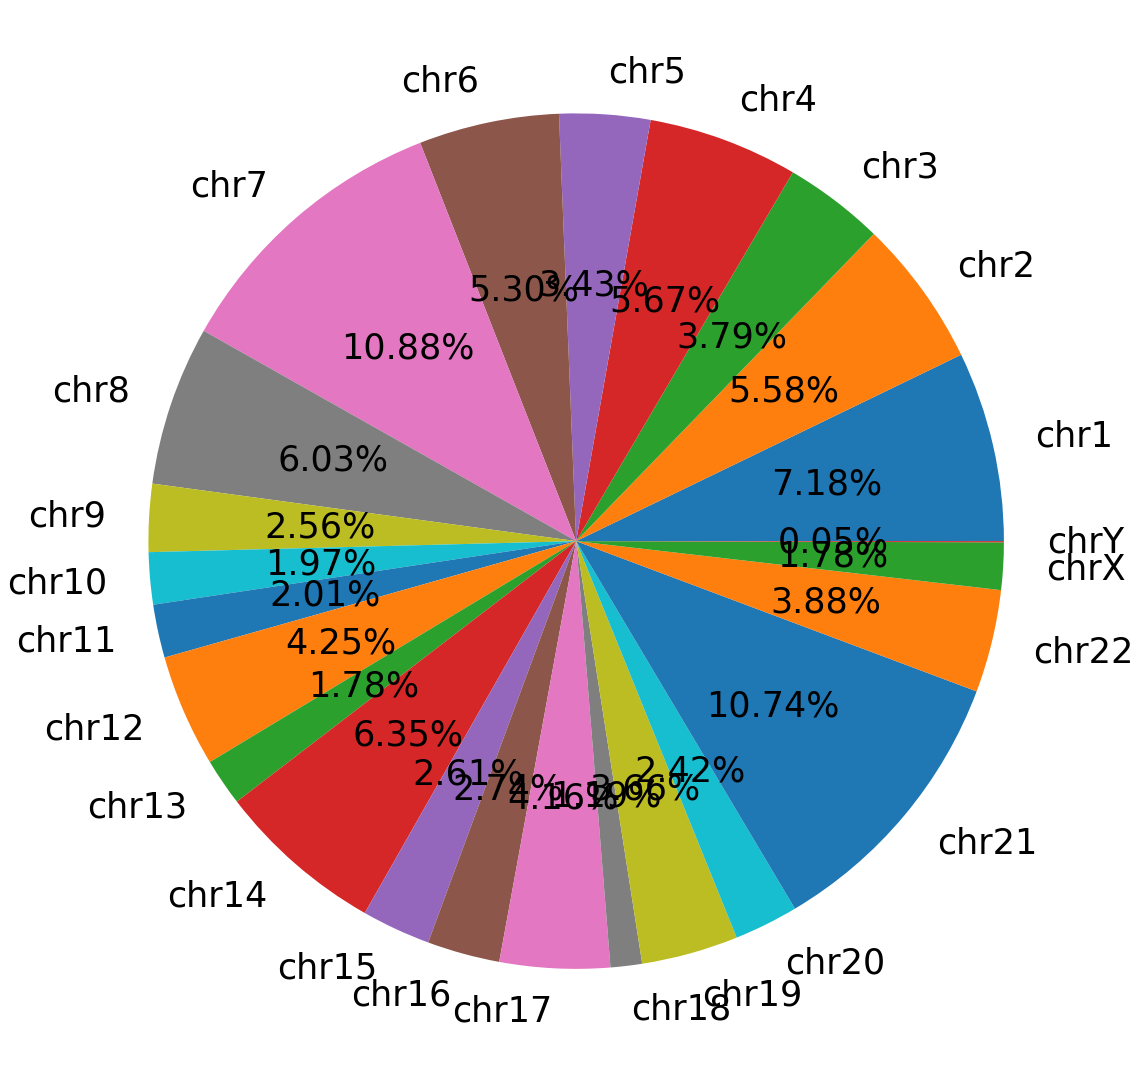

In [58]:
tgen_sv1 = tgen_sv[tgen_sv["SvType"]=="Translocation"]
chr1 = tgen_sv1["CHROM"].values.tolist()
chr2 = [int(i.split(':')[0]) for i in tgen_sv1["END"].values.tolist()]
chrlist = chr1+chr2
count_dict1 = Counter(chrlist)
count_dict1 = dict(sorted(count_dict1.items()))

delly_sv1 = delly_sv[delly_sv["SVTYPE"]=="TRA"]
chr1 = delly_sv1["CHROM"].values.tolist()
chr2 = delly_sv1["CHR2"].values.tolist()
chrlist = chr1+chr2
count_dict2 = Counter(chrlist)
delly_x = count_dict2["X"]
delly_y = count_dict2["Y"]
del count_dict2["X"]
del count_dict2["Y"]
count_dict2 = {int(k):v for k,v in count_dict2.items() if not "GL" in k}
count_dict2 = dict(sorted(count_dict2.items()))

merged_count_dict = {}
for k,v in count_dict2.items():
    if k in count_dict1.keys():
        merged_count_dict[k] = count_dict1[k] + v
    else:
        merged_count_dict[k] = v

merged_count_dict = dict(sorted(merged_count_dict.items()))
merged_count_dict["X"] = delly_x
merged_count_dict["Y"] = delly_y
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(merged_count_dict.values(), labels=['chr'+str(i) for i in merged_count_dict.keys()], autopct='%.2f%%', textprops={'fontsize': 35})
plt.tight_layout()
ax.figure.savefig('sv_tra_piechart.svg', format='svg', dpi=1350, bbox_inches='tight')

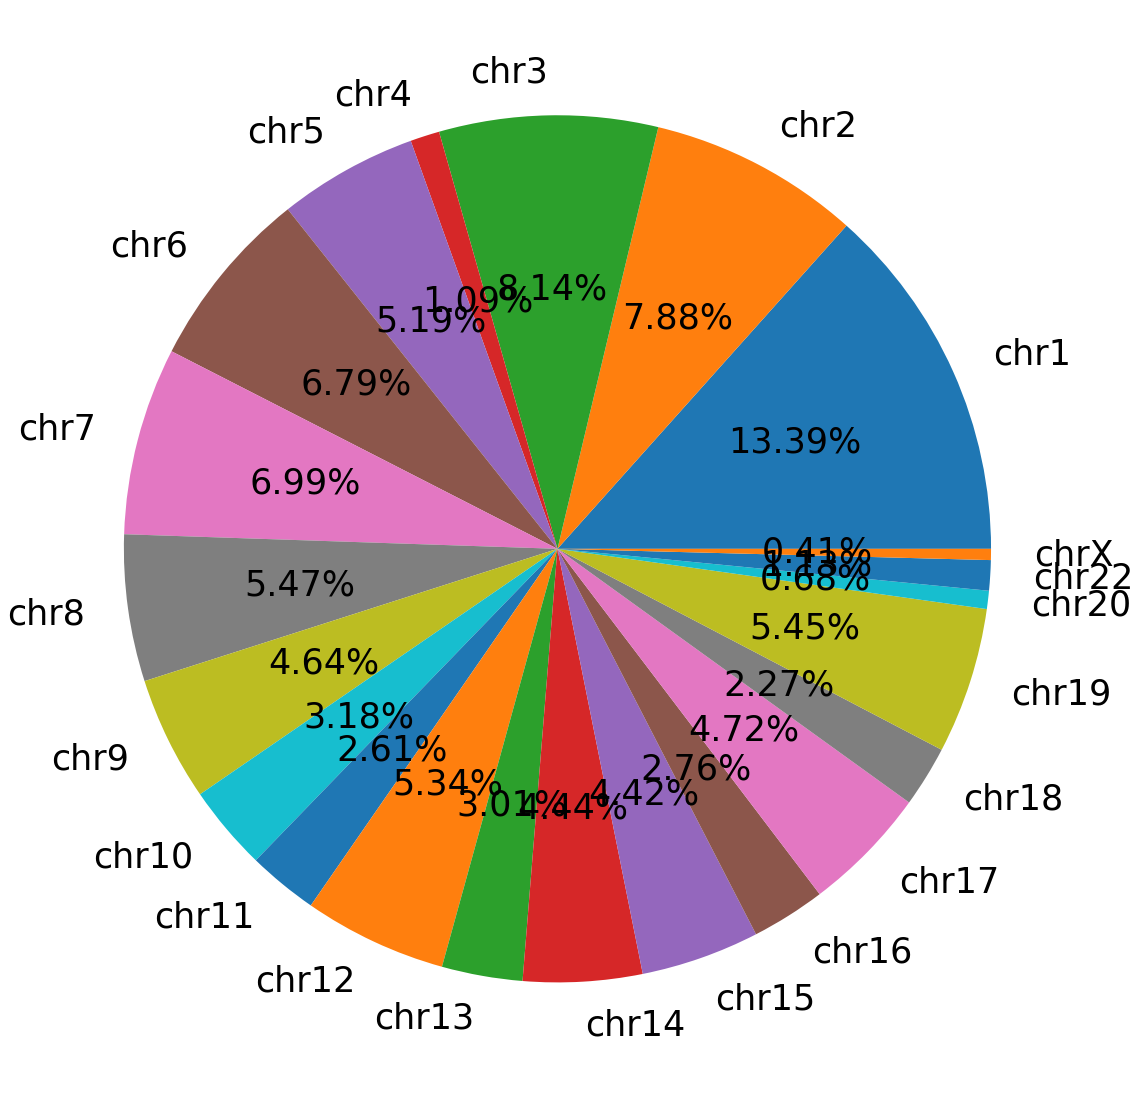

In [68]:
tgen_sv2 = tgen_sv[tgen_sv["SvType"]=="PossibleInversion"]
chr1 = tgen_sv2["CHROM"].values.tolist()
count_dict1 = Counter(chr1)
count_dict1 = dict(sorted(count_dict1.items()))

delly_sv2 = delly_sv[delly_sv["SVTYPE"]=="INV"]
chr2 = delly_sv2["CHROM"].values.tolist()
count_dict2 = Counter(chr2)
delly_x = count_dict2["X"]
del count_dict2["X"]
count_dict2 = {int(k):v for k,v in count_dict2.items()}
count_dict2 = dict(sorted(count_dict2.items()))

merged_count_dict = {}
for k,v in count_dict2.items():
    if k in count_dict1.keys():
        merged_count_dict[k] = count_dict1[k] + v
    else:
        merged_count_dict[k] = v

merged_count_dict = dict(sorted(merged_count_dict.items()))
merged_count_dict["X"] = delly_x
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(merged_count_dict.values(), labels=['chr'+str(i) for i in merged_count_dict.keys()], autopct='%.2f%%', textprops={'fontsize': 35})
plt.tight_layout()
ax.figure.savefig('sv_inv_piechart.svg', format='svg', dpi=1350, bbox_inches='tight')

# Chromosome wise LOF Distribution

In [2]:
gene_features = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/final_compilation_work/gene_features.xlsx", index_col=0)
gene_features = gene_features[["chr_location","mm_lof","mgus_lof"]]
gene_features.head()

,chr_location,mm_lof,mgus_lof
MUC6,chr11,4,10
LILRA1,chr19,20,0
LILRB1,chr19,22,0
PDE4DIP,chr1,18,1
EIF4EBP1,chr8,3,1


In [3]:
lof_chrwise = pd.DataFrame()
chr_name, total_lof = [], []
for chloc in tqdm(set(gene_features["chr_location"])):
    chr_name.append(chloc)
    total_lof.append(gene_features[gene_features["chr_location"]==chloc]["mm_lof"].sum())
    
lof_chrwise["chr_name"] = chr_name
lof_chrwise["total_lof"] = total_lof
lof_chrwise = lof_chrwise.set_index("chr_name")
reorderlist = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7','chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14','chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr21','chr22', 'chrX', 'chrY']
lof_chrwise = lof_chrwise.reindex(reorderlist)
lof_chrwise.to_excel("lof_chrwise.xlsx")
lof_chrwise.head()

100%|██████████| 24/24 [00:00<00:00, 1860.28it/s]


,total_lof
chr_name,
chr1,689
chr2,57
chr3,71
chr4,19
chr5,65


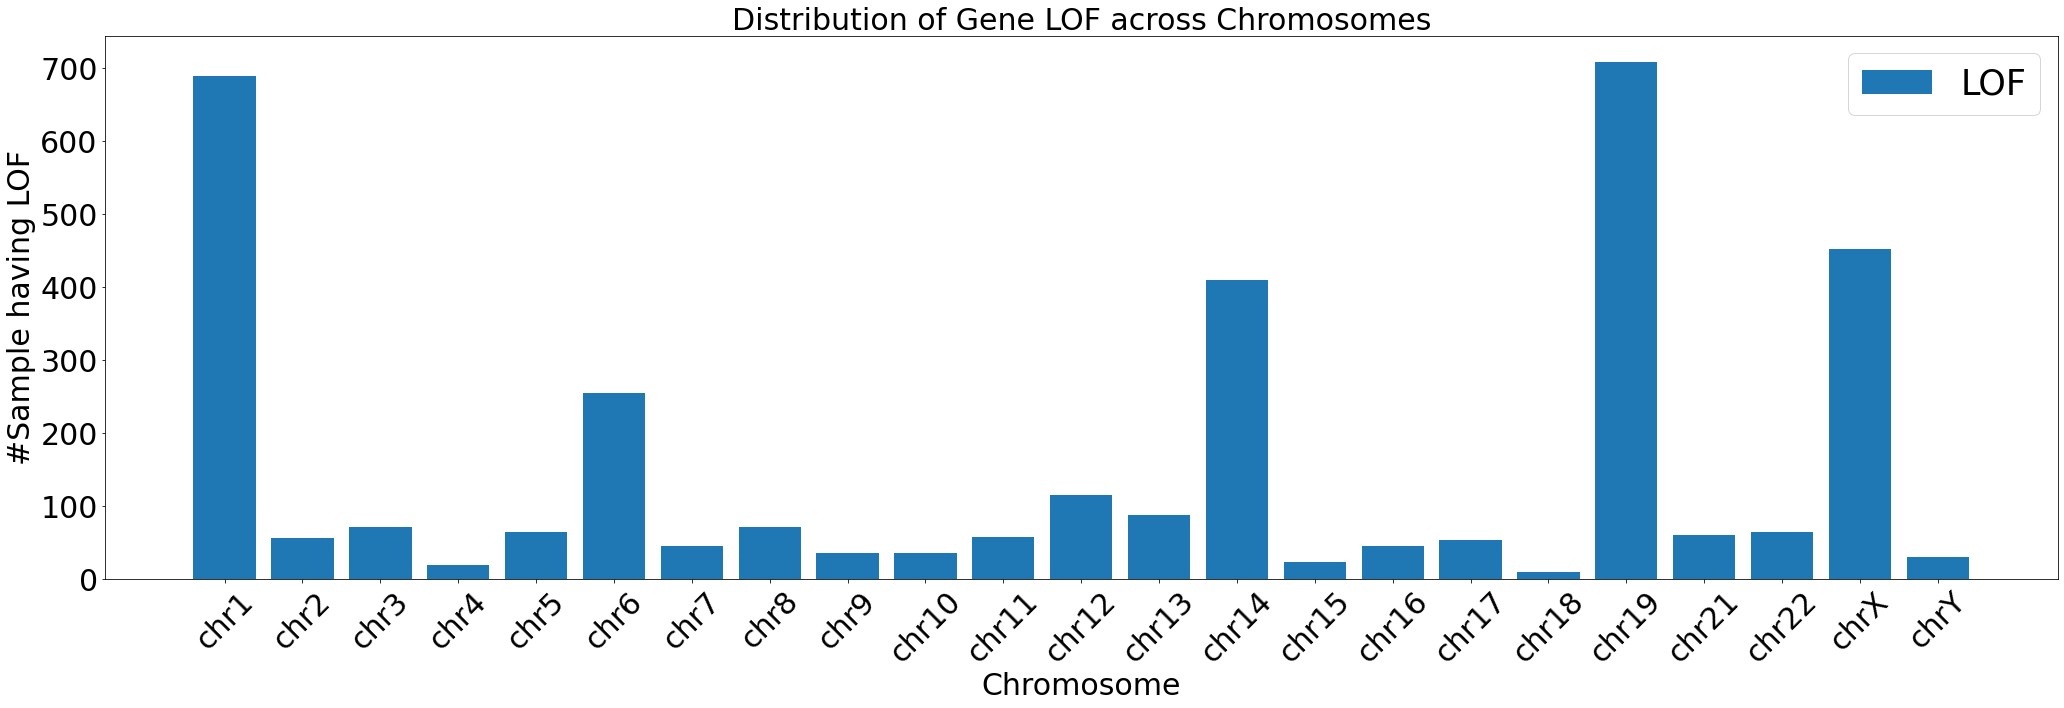

In [4]:
fig, ax = plt.subplots(figsize=(35, 10))
# First plot the 'Male' bars for every day.
ax.bar(lof_chrwise.index, lof_chrwise['total_lof'], label='LOF')
ax.set_title('Distribution of Gene LOF across Chromosomes', fontsize=30)
ax.tick_params(axis='x', labelsize=30, rotation=45)
ax.tick_params(axis='y', labelsize=30)
ax.set_ylabel('#Sample having LOF', fontsize=30)
ax.set_xlabel('Chromosome', fontsize=30)
ax.legend(fontsize=35, loc='upper right')
ax.figure.savefig('lof_distribution.svg', bbox_inches='tight')


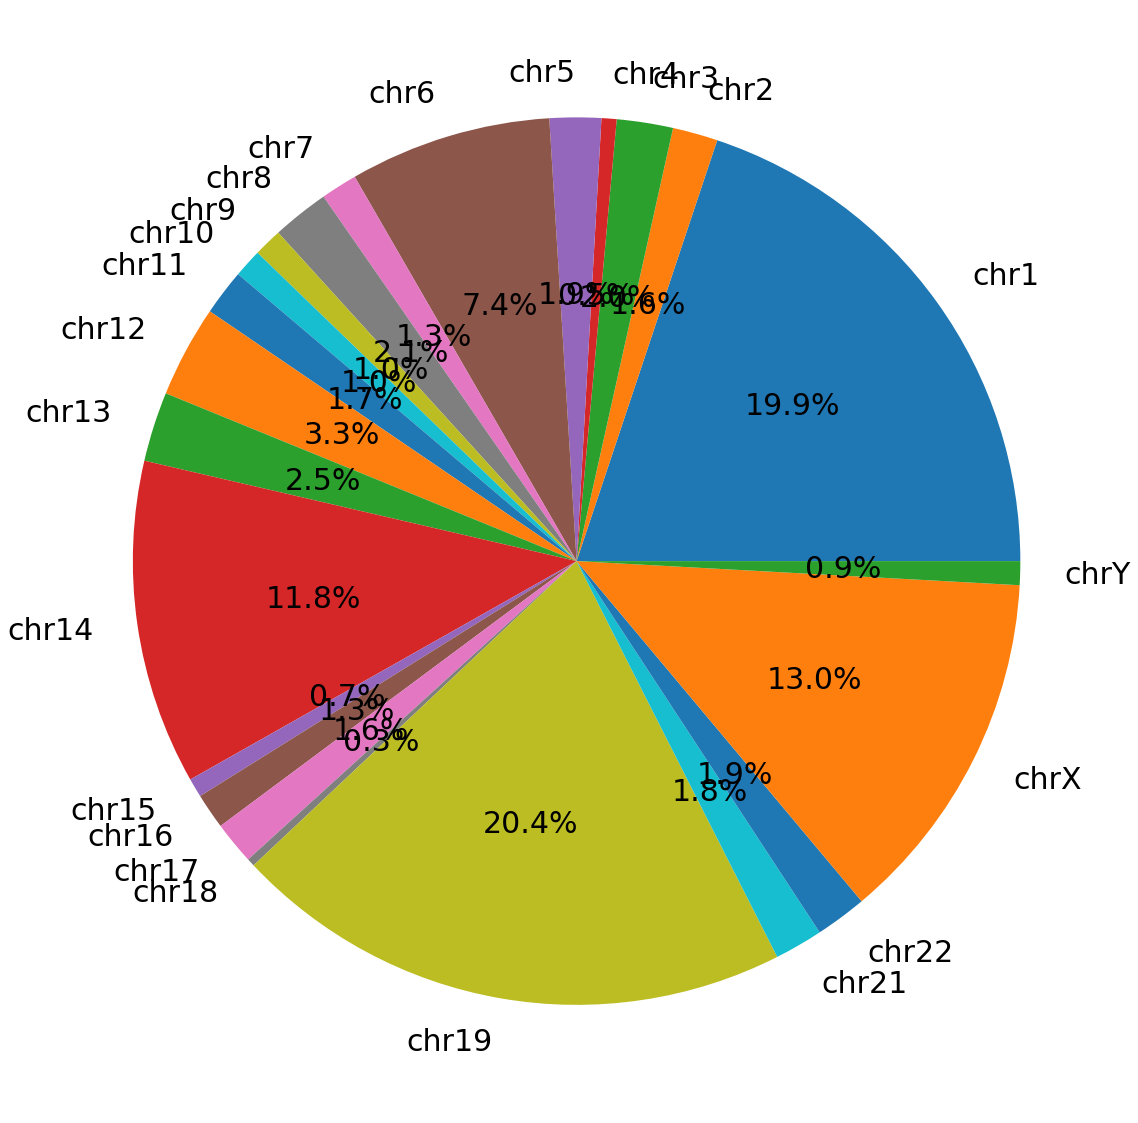

In [14]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(lof_chrwise["total_lof"], labels=lof_chrwise.index, autopct='%.1f%%', textprops={'fontsize': 30})
# ax.set_title('Sport Popularity')
plt.tight_layout()
ax.figure.savefig('lof_piechart.svg', format='svg', dpi=1350, bbox_inches='tight')

In [6]:
geo2r = pd.read_excel("/home/vivek/jupyter_notebooks/bio_dgi_extension/additional_database_validation/top500_dataset_counts.xlsx", index_col=0)
geo2r.head()

,Rank,GSE37302,GSE39683,GSE17306,GSE16558,GSE72213,GSE17498,GSE89182,GSE125363,GSE149833,GSE167042,GSE137369,Total_validated_datasets
Genes,,,,,,,,,,,,,
MUC6,1,0,0,1,0,0,1,0,1,1,0,0,4
LILRA1,2,0,0,0,0,0,0,0,1,1,0,0,2
LILRB1,3,0,0,1,0,0,1,1,1,0,1,0,5
PDE4DIP,4,1,0,1,1,0,1,0,1,0,0,0,5
EIF4EBP1,5,1,0,1,0,0,1,1,1,0,1,0,6


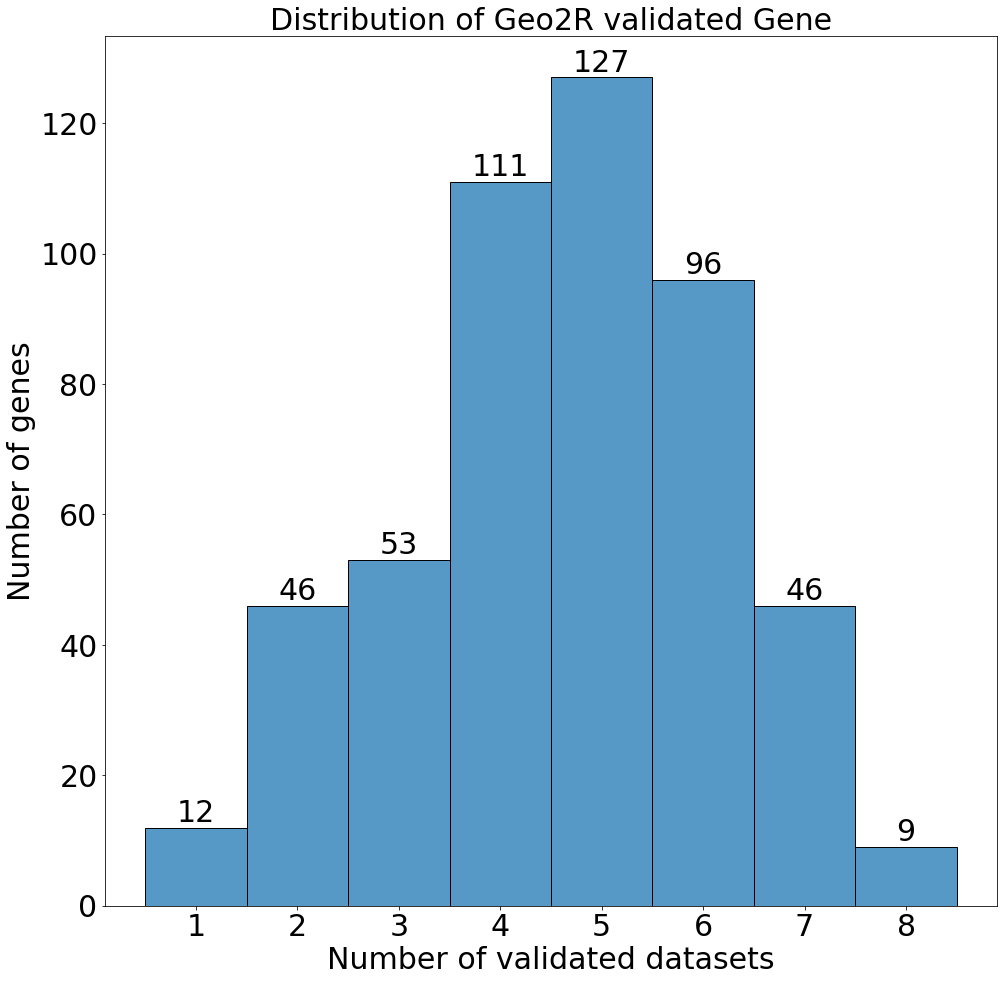

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(16, 16))
# sns.set(style="darkgrid")
ax = sns.histplot(geo2r["Total_validated_datasets"], kde=False, bins=8)
for c in ax.containers:
    labels = [f'{v.get_height()}' for v in c]
    patches = [v.get_x() for v in c]
    ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=30)

ax.set_title('Distribution of Geo2R validated Gene', fontsize=30)
ticklabels = [i for i in range(1,9)]
plt.xticks(ticks, ticklabels, fontsize=30)
# ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_ylabel('Number of genes', fontsize=30)
ax.set_xlabel('Number of validated datasets', fontsize=30)
ax.figure.savefig('geo2r_distribution.svg', bbox_inches='tight')
plt.show()
